In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, Conv2D, Bidirectional, BatchNormalization, SpatialDropout1D, Flatten
from tensorflow.keras import utils
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download('stopwords')

#stop_words = set(stopwords.words('russian') + ['\n', '\r'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    #text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [ ]:
train_start = pd.read_csv('train_start.csv')
test_start = pd.read_csv('test_start.csv')

In [ ]:
train_start

,title,text
0,True,пиздабол ещё тот
1,True,заколебали кукарекать скоро весь пульс будет э...
2,True,на деле собака сутулая
3,True,пшнх от сюда тварь
4,True,плати за мое молчание клоп сутки молчу баксов
...,...,...
27696,False,тут не то что та не работает здравый смысл отс...
27697,False,я тоже в бакс по верил когда он уже стоил
27698,False,ахаха тока щас заметил что за это гавно комисс...
27699,False,я с теслой месяц мучился с плечом в итоге все ...


In [ ]:
len(label_train)

70918

In [ ]:
from sklearn.utils import shuffle

num_words = 40000
max_news_len = 15

text_test = pd.read_csv("test_new.csv").dropna().text
text_train = pd.read_csv("train_new.csv").dropna().text
label_test = pd.read_csv("test_new.csv").dropna().title*1
label_train = pd.read_csv("train_new.csv").dropna().title


tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(text_train)
sequences = tokenizer.texts_to_sequences(text_train)
x_train = pad_sequences(sequences, maxlen=max_news_len, value=0, padding='post')
sequences = tokenizer.texts_to_sequences(text_test)
x_test = pad_sequences(sequences, maxlen=max_news_len, value=0, padding='post')
y_test = label_test

x_train, y_train = shuffle(x_train, label_train, random_state=0)

In [ ]:
x_train, y_train = SMOTE().fit_resample(train_start['text'], train_start['title'])

ValueError: ignored

In [ ]:
data = pd.read_csv('/content/pulse_stage1_patch.csv')

In [ ]:
data['text'] = data.apply(lambda row: preprocess(row.message), axis=1)

In [ ]:
picabu['text'] = data.apply(lambda row: preprocess(row.message), axis=1)

In [ ]:
picabu = pd.read_csv('/content/labeled.csv')

In [ ]:
picabu['text'] = data.apply(lambda row: preprocess(row.message), axis=1)

In [ ]:
ok = pd.read_csv('/content/Ok.csv', error_bad_lines=False, sep=';')

In [ ]:
neg = ok[ok['label']!='NORMAL']
pos = ok[ok['label']=='NORMAL']

In [ ]:
neg.ttext = picabu.apply(lambda row: preprocess(row.text), axis=1)
pos.ttext = picabu.apply(lambda row: preprocess(row.text), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
train = data[data['split']=='train']
test = data[data['split']=='valid']

In [ ]:
X_train = train.text
y_train = train.label
X_test = test.text
y_test = test.label

In [ ]:
X_train = pd.concat((train.text,picabu.text,neg.ttext, pos.ttext),axis=0, ignore_index=True)
y_train = pd.concat((train.label,picabu.toxic.astype(int), pd.Series(np.ones(neg.ttext.shape[0])), 
                     pd.Series(np.zeros(pos.ttext.shape[0]))),axis=0, ignore_index=True)
X_test = test.text
y_test = test.label

In [ ]:
train = {'title': y_train, 'text': X_train}
test = {'title': y_test, 'text': X_test}

In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
train.to_csv('train_start.csv', index=False)
test.to_csv('test_start.csv', index=False)

In [ ]:
train = pd.read_csv('train_new.csv').dropna().reset_index()
test = pd.read_csv('test_new.csv').dropna().reset_index()

In [ ]:
nb_classes = 2

## Загрузка набора данных

Загружаем данные для обучения

In [ ]:
sum(y_train)

20140.0

In [ ]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
    
    

## Сверточная нейронная сеть

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 300, input_length=max_news_len))
model_cnn.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True)))
model_cnn.add(Bidirectional(LSTM(50, activation='relu')))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 100, input_length=max_news_len))
model_cnn.add(SpatialDropout1D(0.5))
model_cnn.add(Bidirectional(LSTM(40, return_sequences=True)))
model_cnn.add(Bidirectional(LSTM(40)))
model_cnn.add(Dropout(0.3))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 100, input_length=max_news_len))
'''model_cnn.add(Conv1D(16, 3, padding='valid', activation='relu'))
#model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(32, 5, padding='valid', activation='relu'))
#model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Conv1D(64, 3, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())'''
model_cnn.add(LSTM(128))
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
embedding_dim = 100


model = Sequential()
model.add(Embedding(num_words, embedding_dim, input_length=max_news_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall(name='Recall'), Precision(name='Precision'), f1_metric])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 15, 100)           4000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 4,065,429
Trainable params: 4,065,429
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

model_cnn.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(name='Recall'), Precision(name='Precision'), f1_metric])


In [ ]:
model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 15, 100)           4000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 4,134,401
Trainable params: 4,134,145
Non-trainable params: 256
_________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      # save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model.fit(x_train, 
                            y_train, 
                            epochs=25,
                            batch_size=128,
                            validation_split=0.1,
                            # callbacks=[checkpoint_callback_cnn]
                            )

Epoch 1/25
499/499 [==============================] - 23s 45ms/step - loss: 0.6047 - accuracy: 0.7154 - Recall: 3.7196e-04 - Precision: 0.3333 - f1_metric: 6.6271e-04 - val_loss: 0.5948 - val_accuracy: 0.7156 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00 - val_f1_metric: 0.0000e+00
Epoch 2/25
499/499 [==============================] - 22s 44ms/step - loss: 0.5888 - accuracy: 0.7163 - Recall: 0.0225 - Precision: 0.5105 - f1_metric: 0.0400 - val_loss: 0.6076 - val_accuracy: 0.7156 - val_Recall: 0.0000e+00 - val_Precision: 0.0000e+00 - val_f1_metric: 0.0000e+00
Epoch 3/25
499/499 [==============================] - 22s 44ms/step - loss: 0.5766 - accuracy: 0.7177 - Recall: 0.0268 - Precision: 0.5122 - f1_metric: 0.0462 - val_loss: 0.6210 - val_accuracy: 0.7119 - val_Recall: 0.0203 - val_Precision: 0.3796 - val_f1_metric: 0.0371
Epoch 4/25
499/499 [==============================] - 22s 44ms/step - loss: 0.5649 - accuracy: 0.7267 - Recall: 0.1237 - Precision: 0.5969 - f1_metric: 0.1980

In [ ]:
``  

In [ ]:
model = Sequential()
model.add(Embedding(num_words,
                    100,
                    trainable=True,
                    input_length=max_news_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model.add(Bidirectional(CuDNNLSTM(32)))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 15, 100)           3000000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 15, 100)           0         
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 15, 128)           84992     
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 64)                41472     
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 65        
Total params: 3,126,529
Trainable params: 3,126,529
Non-trainable params: 0
___________________________________________

In [ ]:
history_cnn = model.fit(x_train, 
                            y_train, 
                            epochs=25,
                            batch_size=128,
                            validation_split=0.1,
                            # callbacks=[checkpoint_callback_cnn]
                            )

Epoch 1/25
317/317 [==============================] - 14s 36ms/step - loss: 0.0000e+00 - accuracy: 0.1885 - val_loss: 0.0000e+00 - val_accuracy: 0.1949
Epoch 2/25
317/317 [==============================] - 11s 34ms/step - loss: 0.0000e+00 - accuracy: 0.1935 - val_loss: 0.0000e+00 - val_accuracy: 0.1949
Epoch 3/25
317/317 [==============================] - 11s 34ms/step - loss: 0.0000e+00 - accuracy: 0.1878 - val_loss: 0.0000e+00 - val_accuracy: 0.1949
Epoch 4/25
317/317 [==============================] - 11s 34ms/step - loss: 0.0000e+00 - accuracy: 0.1931 - val_loss: 0.0000e+00 - val_accuracy: 0.1949
Epoch 5/25
317/317 [==============================] - 11s 34ms/step - loss: 0.0000e+00 - accuracy: 0.1909 - val_loss: 0.0000e+00 - val_accuracy: 0.1949
Epoch 6/25
116/317 [=========>....................] - ETA: 6s - loss: 0.0000e+00 - accuracy: 0.1947

KeyboardInterrupt: ignored

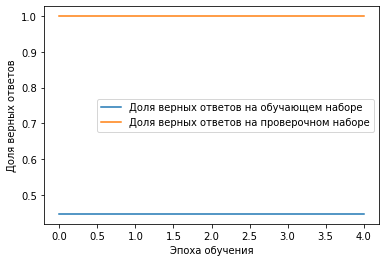

In [ ]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
label_test.describe()

count    6905.000000
mean        0.033020
std         0.178701
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: title, dtype: float64

In [ ]:
from sklearn.metrics import f1_score

def threshold_answ(label_predict, threshold = 0.50):
  label_predict_step = []
  for lab in label_predict:
    if lab >= threshold :
      label_predict_step.append(1);
    else:
      label_predict_step.append(0);    
  return label_predict_step

test_sequences = tokenizer.texts_to_sequences(text_test)	
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

label_predict = model_cnn.predict(x_test)
label_predict_step = threshold_answ(label_predict)


# pd.DataFrame([label_predict_step, label_test.to_list()])
print('Оценка F1', f1_score(label_predict_step, label_test.to_list()))

Оценка F1 0.11025641025641027


In [ ]:
label_test.to_list()

0       0
1       0
2       1
3       0
4       1
       ..
6901    0
6902    0
6903    0
6904    0
6905    0
Name: title, Length: 6905, dtype: int64

In [ ]:
test_sequences = tokenizer.texts_to_sequences(text_test)	
x_test = pad_sequences(test_sequences, maxlen=max_news_len, value=0, padding='post')
f1_score(label_test.to_list(),model_cnn.predict_classes(x_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.06392822094490397

In [ ]:
model_cnn.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
import tensorflow_hub as hub
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, Conv2D, GlobalMaxPool1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow.keras.metrics import Precision, Recall

nb_filters=50
FFN_units=512
nb_classes=1
dropout_rate=0.1
name="dcnn"


model_4 = Sequential()

model_4.add(hub.KerasLayer(
      "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
      trainable=False))
model_4.add(Conv1D(filters=nb_filters,
                kernel_size=2,
                padding="valid",
                activation="relu"))
model_4.add(Conv1D(filters=nb_filters,
                  kernel_size=3,
                  padding="valid",
                  activation="relu"))
model_4.add(Conv1D(filters=nb_filters,
      kernel_size=4,
      padding="valid",
      activation="relu"))
model_4.add(GlobalMaxPool1D())
model_4.add(Dense(units=FFN_units, activation="relu"))
model_4.add(Dropout(rate=dropout_rate))
model_4.add(Dense(units=1, activation="sigmoid"))

model_4.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', Recall(name='Recall'), Precision(name='Precision')])

In [ ]:
model_4_save_path = 'best_model_4.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_4_save_path, 
                                      monitor='val_accuracy',
                                      # save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model_4.fit(x_train, 
                            y_train, 
                            epochs=25,
                            batch_size=128,
                            validation_split=0.1,
                            # callbacks=[checkpoint_callback_cnn]
                            )

Epoch 1/25


ValueError: ignored

In [ ]:
import tensorflow as tf


In [ ]:
class DCNNBERTEmbedding(tf.keras.Model):
    
    def __init__(self,
                 nb_filters=50,
                 FFN_units=512,
                 nb_classes=1,
                 dropout_rate=0.1,
                 name="dcnn"):
        super(DCNNBERTEmbedding, self).__init__(name=name)
        
        self.bert_layer = hub.KerasLayer(
            "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
            trainable=False)

        self.bigram = Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding="valid",
                                    activation="relu")
        self.trigram = Conv1D(filters=nb_filters,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu")
        self.fourgram = Conv1D(filters=nb_filters,
                                      kernel_size=4,
                                      padding="valid",
                                      activation="relu")
        self.pool = GlobalMaxPool1D()
        self.dense_1 = Dense(units=FFN_units, activation="relu")
        self.dropout = Dropout(rate=dropout_rate)
#        if nb_classes == 2:
        self.last_dense = Dense(units=nb_classes,
                                           activation="sigmoid")
#        else:
#            self.last_dense = layers.Dense(units=nb_classes,
#                                           activation="softmax")
    
    def embed_with_bert(self, all_tokens):
        _, embs = self.bert_layer([all_tokens[:, 0, :],
                                   all_tokens[:, 1, :],
                                   all_tokens[:, 2, :]])
        return embs

    def call(self, inputs, training):
        x = self.embed_with_bert(inputs)

        print(x.shape)

        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis=-1) # (batch_size, 3 * nb_filters)
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output

In [ ]:
NB_FILTERS = 100
FFN_UNITS = 256
NB_CLASSES = 1

DROPOUT_RATE = 0.5

BATCH_SIZE = 32
NB_EPOCHS = 2

In [ ]:
Dcnn = DCNNBERTEmbedding(nb_filters=NB_FILTERS,
                         FFN_units=FFN_UNITS,
                         nb_classes=NB_CLASSES,
                         dropout_rate=DROPOUT_RATE)

In [ ]:
Dcnn.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [ ]:
checkpoint_path = "./"

ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=1)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Latest checkpoint restored!!")

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        ckpt_manager.save()
        print("Checkpoint saved at {}.".format(checkpoint_path))

In [ ]:
Dcnn.fit(x_train, y_train,
         epochs=NB_EPOCHS,
         callbacks=[MyCustomCallback()])

Epoch 1/2


ValueError: ignored

In [ ]:
!pip install -q tensorflow-hub
!pip install -q tensorflow-datasets

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

NameError: ignored

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense_24 (Dense)             (None, 16)                816       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history_model = model.fit(x_train, 
                            y_train, 
                            epochs=25,
                            batch_size=128,
                            validation_split=0.1,
                            # callbacks=[checkpoint_callback_cnn]
                            )

Epoch 1/25


ValueError: ignored